<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-summary" data-toc-modified-id="Text-summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text summary</a></span><ul class="toc-item"><li><span><a href="#Only-Textual" data-toc-modified-id="Only-Textual-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Only Textual</a></span></li><li><span><a href="#Plot-of-the-text" data-toc-modified-id="Plot-of-the-text-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot of the text</a></span></li></ul></li><li><span><a href="#Plotting-curves" data-toc-modified-id="Plotting-curves-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting curves</a></span><ul class="toc-item"><li><span><a href="#Validation-DataSet" data-toc-modified-id="Validation-DataSet-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Validation DataSet</a></span></li><li><span><a href="#History-Object" data-toc-modified-id="History-Object-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>History Object</a></span></li><li><span><a href="#Plotting-Curves" data-toc-modified-id="Plotting-Curves-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plotting Curves</a></span></li></ul></li><li><span><a href="#Saving-the-model" data-toc-modified-id="Saving-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Saving the model</a></span><ul class="toc-item"><li><span><a href="#Loading-the-model" data-toc-modified-id="Loading-the-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loading the model</a></span></li></ul></li></ul></div>

# Text summary

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Only Textual

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

## Plot of the text

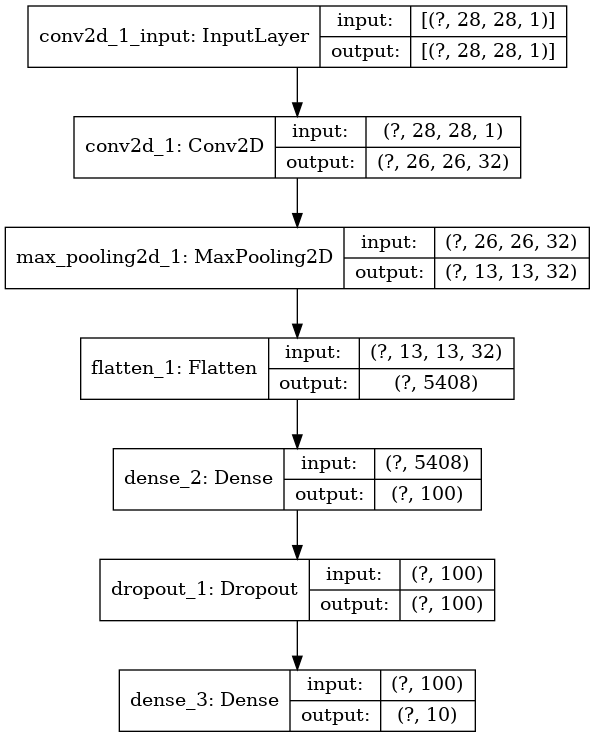

In [7]:
plot_model(model, 'model.png', show_shapes=True)

# Plotting curves

<h2>Validation DataSet</h2><br>
A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters. The validation dataset may also play a role in other forms of model preparation, such as feature selection. The final model could be fit on the aggregate of the training and validation datasets.

## History Object

The fit function will return a history object that contains a trace of performance metrics recorded at the end of each training epoch. This includes the chosen loss function and each configured metric, such as accuracy, and each loss and metric is calculated for the training and validation datasets.

## Plotting Curves

A learning curve is a plot of the loss on the training dataset and the validation dataset. We can create this plot from the history object using the Matplotlib library.

In [2]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [3]:
# Createa a dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
n_features = X.shape[1]

In [4]:
#define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [5]:
#compile the model
sgd = SGD(learning_rate=0.01, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

In [6]:
#fit the model
hostory = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

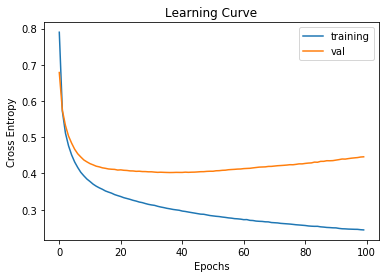

In [8]:
#plot the learning curve
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(hostory.history['loss'], label='training')
plt.plot(hostory.history['val_loss'], label = 'val')
plt.legend()
plt.show()

The cross-entropy loss for the training dataset is accessed via the ‘loss‘ key and the loss on the validation dataset is accessed via the ‘val_loss‘ key on the history attribute of the history object.

# Saving the model

The model is saved in H5 format, an efficient array storage format.

In [9]:
model.save('synthetic_binary_classifier.h5')

## Loading the model

In [10]:
from tensorflow.keras.models import load_model

In [11]:
loadded_model = load_model('synthetic_binary_classifier.h5')

In [12]:
testX = row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
testY = model.predict([row])
print(testY)

ValueError: Error when checking input: expected dense_input to have shape (20,) but got array with shape (4,)